# Predicting building heating and cooling loads using supervised machine learning algorithms
The data has 768 training examples with 8 input variables and 2 output variables
#### 8 input variables:
    * X1: relative compactness
    * X2: surface area
    * X3: wall area
    * X4: roof area
    * X5: overall height
    * X6: orientation
    * X7: glazing area
    * X8: glazing area distribution
#### 2 output variables:
    * Y1: heating load
    * Y2: cooling load
#### Machine learning models include linear regression and tree-based methods (decision tree, random forest and XGBoost)

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [10, 5]

# 1 Exploratory data analysis (EDA)

In [2]:
df = pd.read_excel('ENB2012_data.xlsx')

In [3]:
df.info

<bound method DataFrame.info of        X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]>

In [4]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.tail(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## 1.1 Plotting probability densities of each variable using histograms

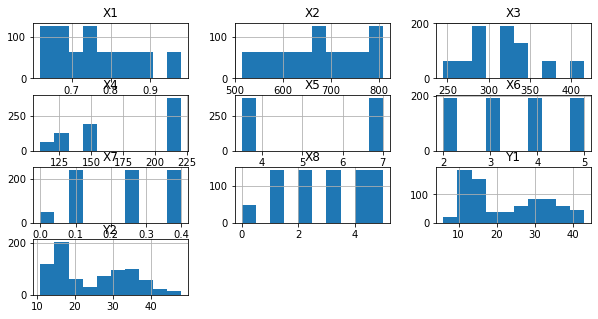

In [7]:
hist = df.hist(bins=10)

### Histograms show that the data is non-Gaussian

In [8]:
# normaliza the data to lie between 0 and 1
scale = MinMaxScaler()
df_normalize = pd.DataFrame(scale.fit_transform(df.values), columns=df.columns, index=df.index)

In [9]:
df_normalize.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


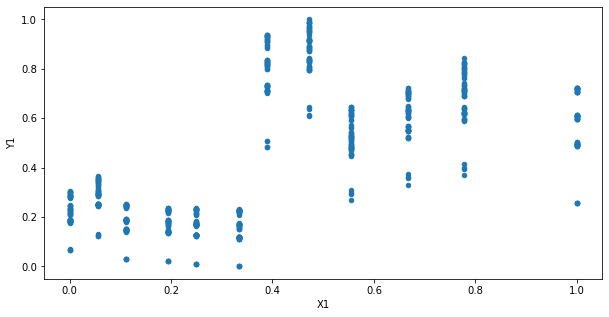

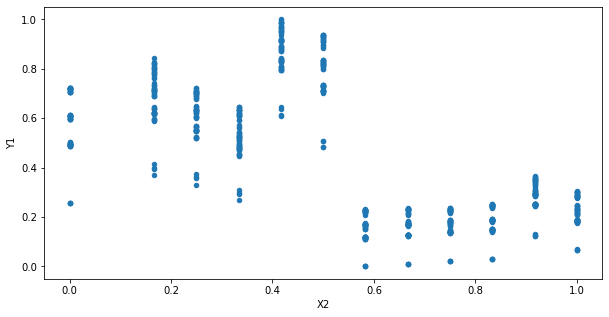

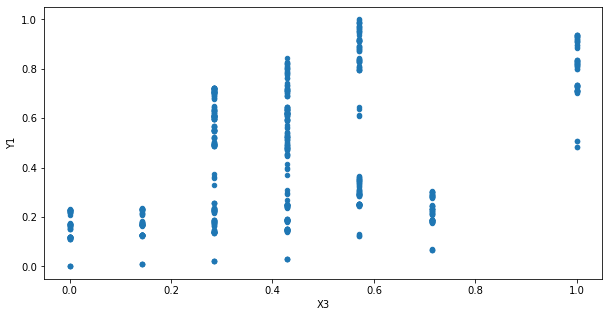

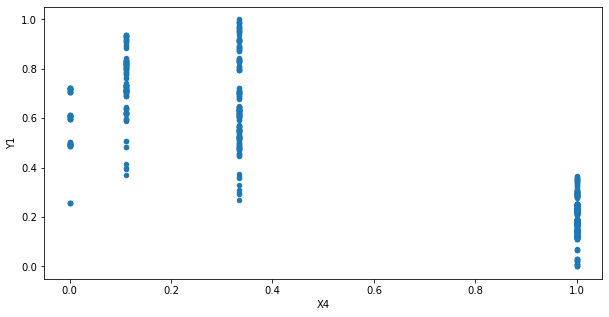

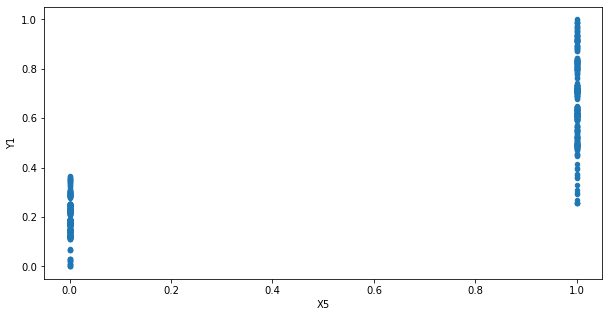

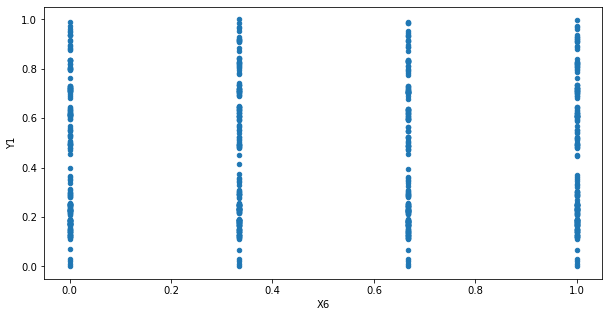

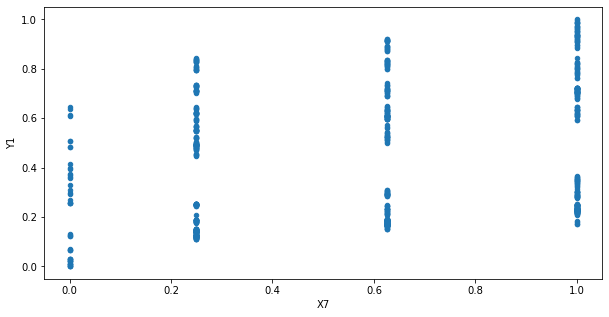

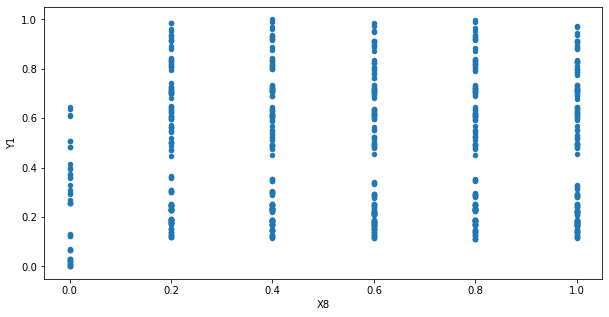

In [10]:
for column in df.columns[:-2]:
    df_normalize.plot.scatter(x=column, y='Y1')
    plt.show()

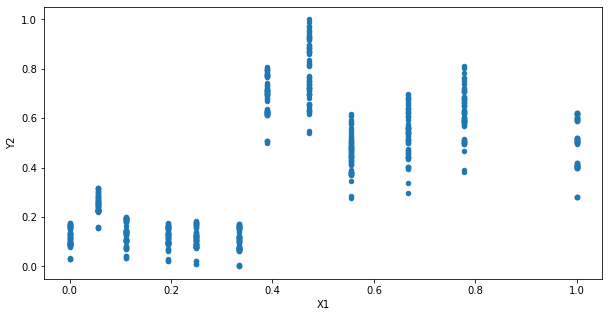

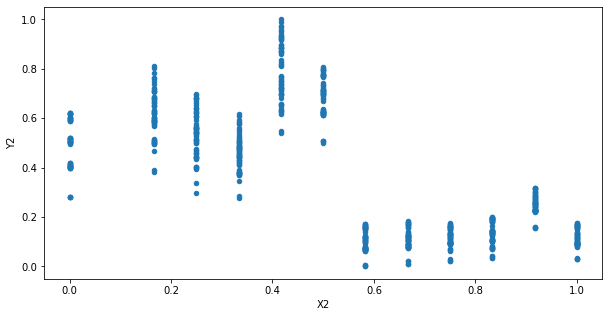

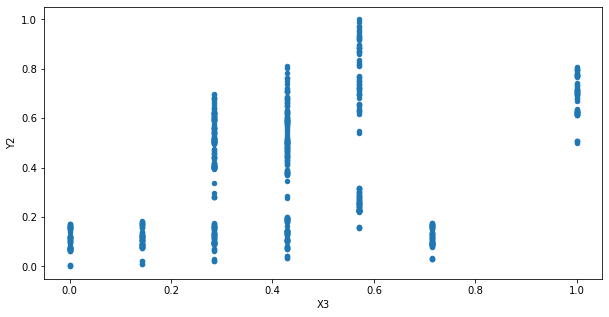

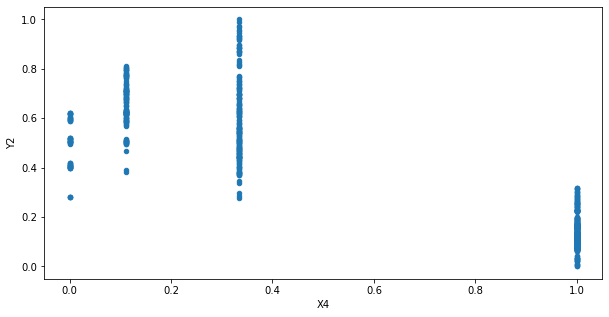

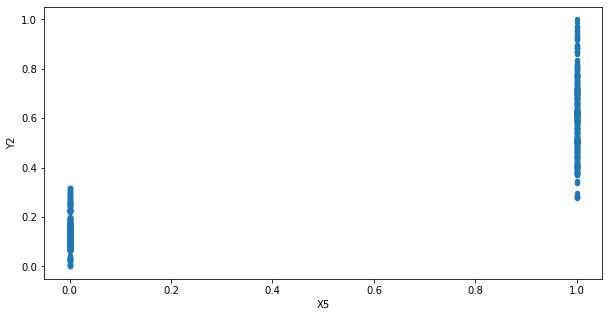

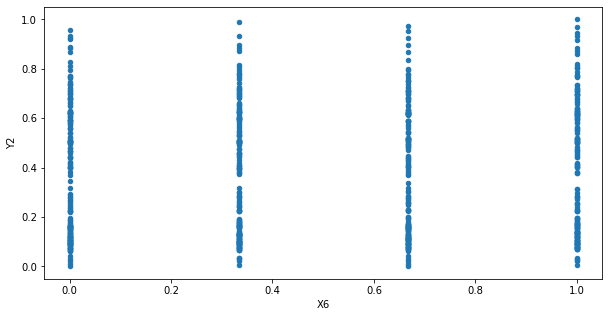

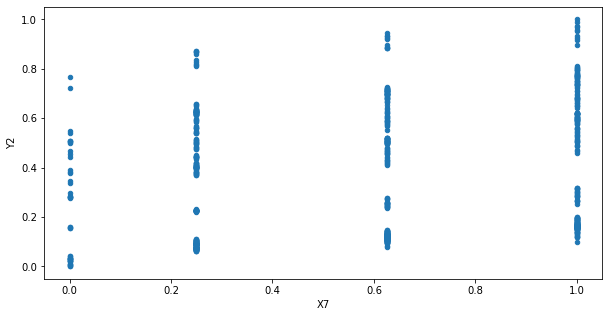

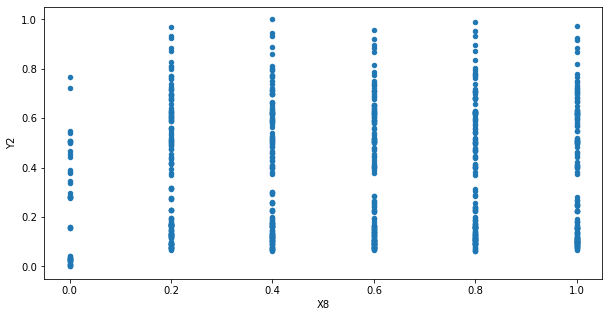

In [11]:
for column in df.columns[:-2]:
    df_normalize.plot.scatter(x=column, y='Y2')
    plt.show()

## 1.2 Check correlation between pairs of variables
* Spearman rank correlation coefficient assesses how well the relationship between two variables can be described by a monotonic function.
* The coefficient lies in the range between -1 and 1, where -1 indicates inversely proportional and 1 indicates proportional. The magnitude indicates the strength of the association.

In [12]:
corr_matrix = df_normalize.corr(method='spearman')

In [13]:
# check how much each feature correlates with Y1 and Y2
corr_matrix['Y1'].sort_values(ascending=False)

Y1    1.000000
Y2    0.972689
X5    0.861283
X1    0.622135
X3    0.471458
X7    0.322860
X8    0.068343
X6   -0.004168
X2   -0.622135
X4   -0.804027
Name: Y1, dtype: float64

In [14]:
corr_matrix['Y2'].sort_values(ascending=False)

Y2    1.000000
Y1    0.972689
X5    0.864876
X1    0.651019
X3    0.415991
X7    0.288904
X8    0.046477
X6    0.017606
X2   -0.651019
X4   -0.803175
Name: Y2, dtype: float64

# 2 Model implementation and evaluation

In [15]:
# define input and output
X = df_normalize.iloc[:, :-2] # 8 input variables
y1 = df_normalize.iloc[:, -2] # first output
y2 = df_normalize.iloc[:, -1] # second output

In [16]:
# divide the dataset as train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.3, random_state=2)

## 2.1 Linear regression

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X_train1, y_train1)

LinearRegression()

In [19]:
y_pred1 = lin_reg.predict(X_test1)